# Support Vector Regression

Support vector machines, or SVMs, are typically used for classification problems. Support vector regressors use the same underlying principles as support vector machines with a different objective function. The intuition is the same, the objective function is different. 

Let's understand how support vector machines for classification differ from support vector machines for regression. When we use SVMs for classification, the machine learning model will try to find the widest margin with the most distance from the nearest points. That is from the support vectors. The classification is better if this margin is as wide as possible. 

Support vector machine regression, on the other hand, tries to find the line that best fits the points. And this is a regression line that lies between the support vector machine margin. 

Now the whole idea of SVM classification is that you want no points to be within the margin. That's what divides your data cleanly into categories. And this is where SVM regression is different. It has a different objective function. It seeks to maximize the number of points inside a margin. You want all of your points to lie inside the margin and then for the regression line. So when you're performing SVM classification and you find this margin points far away from the margin are good, that means they improve the objective function value of the classifier. On the other hand, with SVM regression points which lie far away from the margin are considered bad. They worsen the objective function value. Ideally, you want all of your points to lie within the margin. 


With SVM classification outliers which are on the wrong side of this line are penalized. So if you have a red point on the side of the blue points, that's an outlier and that is penalized. With SVM regression, it doesn't matter what category your points belong to, whether it's red or blue, but points which are just far away from the margin are penalized. 

With SVM classification, when you run your classifier model, the width of the margin is found by the optimizer. The ML model tries to make this margin as wide as possible. 

With regression, the width of the margin is something that you specify upfront, and this requires another hyperparameter called epsilon. The epsilon value that you specify is a part of the model design in regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# we can turn off warnings like the one seen above
# not recommended in production. Turning off for the sake of getting rid of it.
import warnings
warnings.filterwarnings("ignore") # never print matching warnings

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
automobile_df = pd.read_csv('../datasets/auto-mpg-processed.csv')

In [5]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,35.0,4,72.0,69,1613,18.0,49
1,26.0,4,98.0,90,2265,15.5,47
2,23.7,3,70.0,100,2420,12.5,40
3,33.0,4,105.0,74,2190,14.2,39
4,30.5,4,98.0,63,2051,17.0,43


In [6]:
result_dict = {}

In [40]:
#  helper function
def build_model(regression_fn,
               name_of_y_col,
               names_of_x_col,
               dataset,
               test_frac =0.2,
               preprocess_fn =None,
               show_plot_Y=False,
               show_plot_scatter=False):
    X =dataset[names_of_x_col]
    Y =dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    model = regression_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print("Training Score : ",model.score(x_train,y_train))
    print("Test Score     : ",r2_score(y_test,y_pred))
    
    if show_plot_Y==True:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.plot(y_pred,label='Predicted')
        plt.plot(y_test.values,label = "Actual")
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
    if show_plot_scatter==True:
        #will work only if single feature is used for training
        fig,ax =plt.subplots(figsize=(12,8))
        plt.scatter(x_test,y_test)
        plt.plot(x_test,y_pred,'o')
        
        plt.legend()
        plt.show()
    return {
        "Training_Score": model.score(x_train,y_train),
        "Test_Score": r2_score(y_test,y_pred)
    }

In [8]:
def compare_results():
    for key in result_dict:
        print("Regression    :",key)
        print("Training Score:",result_dict[key]['Training_Score'])
        print("Test Score    :",result_dict[key]['Test_Score'])
        print()

There are two estimator objects that you can use in scikit-learn to perform support vector regression, SVR or LinearSVR. They're essentially the same, the LinearSVR is simply the SVR with a linear kernel. 

A kernel is simply a shortcut function that the algorithm uses behind the scenes in order to transform higher dimensional data into dimensions that are easier to work with. 

As per scikit-learn's documentation, the LinearSVR function offers more flexibility in the choice of penalties that you can impose and loss functions and skills better to larger datasets. Our dataset is fairly small here, so I'll go with the SVR estimator object. 

In [10]:
def svr_reg(x_train,y_train,kernel = 'linear',epsilon = 0.05,c=0.3):
    model = SVR(kernel=kernel,epsilon=epsilon,C=c)
    model.fit(x_train,y_train)
    
    return model

The support vector regressor tries to fit as many points as possible into a margin surrounding the best fit line that it calculates. If this margin were larger, more points would be able to fit in, but maybe this best fit line would not be a good approximation of the underlying data. So there is a tradeoff here. 

The parameter that we specified here, epsilon, is the margin or the epsilon tube to use with our model. The margin into which the support vector regressor tries to fit as many points as possible is given by two multiplied by this epsilon. 

C is a penalty that we apply to points which lie outside the epsilon tube while calculating errors for our best fit line. When points lie outside the epsilon tube, that's called a margin violation, and this penalty seeks to reduce the number of margin violations when we fit our model. 

If you specify a very high value for C, that imposes a heavy penalty on outliers. 

Let's now use the support vector regressor to build entry in our machine learning model on our automobile dataset. 




Training Score :  0.7008154597405093
Test Score     :  0.7186952676634953


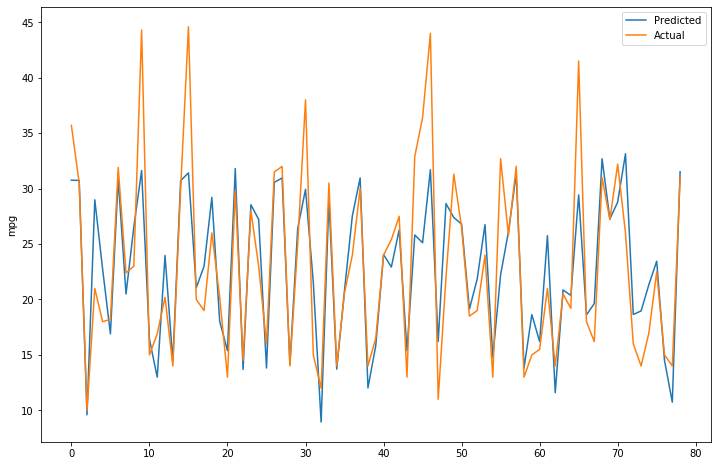

In [14]:
result_dict['kitchen_sink_svr'] = build_model(svr_reg,'mpg',
                                             ['cylinders','displacement',
                                            'horsepower','weight','acceleration'],
                                             automobile_df,
                                             show_plot_Y=True)

Once again, this is a kitchen sink regression. Given all of the constraints that we've imposed on this regressor, this model performs decently well. Its R square on the test data is about 71.8 %. If you want to compare the results of this model with other models that we've trained in the past, simply call compare_results. Here is the result of our kitchen sink SVR regression model. You can compare it with elastic net, that's what we performed last. 

You can see that for this particular dataset and based on the parameters that we've chosen, the two models are fairly close on training and for test elasticnet has 75%

# NEAREST NEIGHBOURS

Nearest neighbors regression uses the training data to find what is more similar to the current sample. So you have the training data which will find the locations of all of your samples in an N-dimensional hypercube, and once you have a new sample come in, it'll try and find what set of points are closest to this new sample.

There are two techniques that you can use to perform nearest neighbors regression. By far the most common and popular one is the k-nearest neighbors regression algorithm. 

Another variant is the radius neighbors regression algorithm. 

K-nearest neighbors regression involves finding the K closest points to your data, and you'll find the average value of the K nearest neighbors. This average of the y value of the k nearest neighbors is your predicted value for this new sample. 

With radius neighbors regression, you'll define your neighbors as all of the data points that lie within a certain radius, and you'll find the average y values of neighbors within that radius. 

Let's quickly visualize this on our 2D plane. K-nearest neighbors, let's say you have data points scattered as you see here on the picture below, and you have a new data point(*) for which you want to predict values. You'll find that k-nearest neighbors to this data point and then make your prediction. You'll average the y values of these k-nearest neighbors, remember, K is something that you can define for a model, and then make that y value your prediction. 

<img src="../files/Capture1.png">

In the case of radius neighbors regression, you'll draw a circle with a certain radius around the new data point for which you want to predict the y value. All of the data points which lie within that radius are neighbors, and then you'll find the average y value of all of the neighbors. The way you'll determine neighbors is what is different here.

<img src="../files/Capture2.png">

### KNN

When you build and train your k-nearest neighbors regression model, it calculates a similarity measure across all of the data points present in your dataset. Then, when your model encounters a particular test instance it hasn't seen before, the KNN regressor finds the k-nearest neighbors to that particular test instance and combines their values together in some way in order to make a prediction for your test instance.

In [16]:
def kneighbours_reg(x_train,y_train,n_neighbors=10):
    model=KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    
    return model

Now, the number of neighbors you want your regression model to use in order to make predictions is something that you can specify. The default value for the KNN regressor model is 5 neighbors; we've specified a value of 10 here. The right value of number of neighbors depends on your dataset, and it's something that you find using something called hyperparameter tuning

Behind the scenes, this regression model can use a number of different algorithms to compute the nearest neighbors. It can also use brute force. By default, this estimator object chooses the best algorithm based on your data. Let's build and train a KNN regression model and perform kitchen sink regression. 

Training Score :  0.7492230035540468
Test Score     :  0.7643212037884277


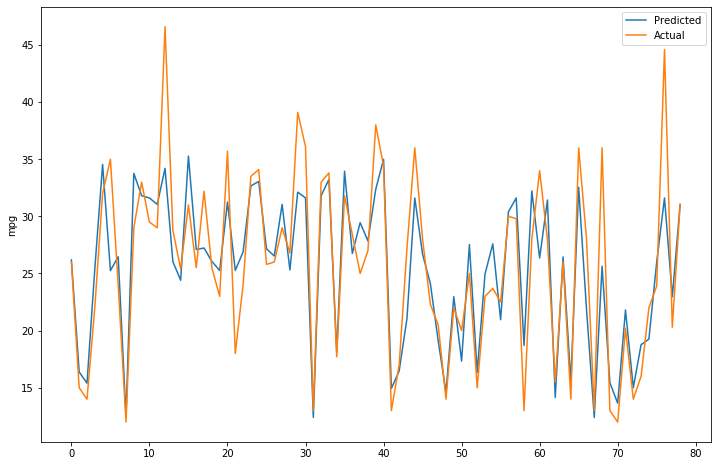

In [19]:
result_dict['kitchen_sink_knn'] = build_model(kneighbours_reg,'mpg',
                                             ['cylinders','displacement',
                                            'horsepower','weight','acceleration'],
                                             automobile_df,
                                             show_plot_Y=True)

And if you take a look at the training and test R square scores, you'll find that this model performs the best on our dataset. Both scores are high at around 75%. If you want to see how this model performs against others that you've trained before, use compare_results. The training and testing scores of all models are available here, and you can see at a glance that the k-nearest neighbors regressor has performed the best so far on our dataset.

In [20]:
compare_results()

Regression    : kitchen_sink_svr
Training Score: 0.7008154597405093
Test Score    : 0.7186952676634953

Regression    : kitchen_sink_knn
Training Score: 0.7492230035540468
Test Score    : 0.7643212037884277



# SGD Regressor

SGD stands for stochastic gradient descent. This is an iterative model where you use multiple iterations to find the best linear model that fits your underlying data.

 Now we know that the best fit line here is the regression line, and it is that line which has the minimum least square error. Now we have to find the regression coefficients that give us this best fit line.

<img src="../files/Capture4.png">

Assume that these regression coefficients are w and b and are expressed along the two axes that you see. The mean square error is expressed along the third axis, the Z axis. Now, for different values of w and b, the mean square error, or the loss function, will have a different value,

<img src="../files/Capture3.png">

imagine that this hypothetical curve represents the different values of MSE for different regression coefficients. Now, somewhere along this curve is the smallest possible value of the mean square error, and what we are trying to do when we build our regression model is to find those regression coefficients, w and b, which give us this mean square error that is as small as possible. So what are the regression coefficients that will give us the smallest value of MSE? 

Well, that's what stochastic gradient descent tries to figure out iteratively. The way this really works is that it will start off at some initial value of the mean square error. So w and b, or your regression coefficients, have some initial value. It'll then perform gradient descent down this slope in order to figure out the smallest value of MSE and the values of w and b that correspond to the smallest MSE. So the stochastic gradient descent optimization algorithm will iteratively tweak the values of your regression coefficient in order to walk down the slope to converge on the best value of MSE. And this is what the training process of the stochastic gradient descent regressor involves, finding these best values, the regression coefficients of your model. 

<img src="../files/Capture5.png">

The gradient descent term comes from the fact that your model has to walk down the slope to converge on the best values of MSE in order to give you your regression coefficients. Thus, by considering your data points, a single data point at the time or in batches, stochastic gradient descent iteratively converges to the best possible model. Here are a few highlights of the SGD regressor. 

- You can use different loss functions to train your SGD regressor models. 


- If you use the mean square error loss, that will give you the ordinary least square regression model. 


- You can also use different loss functions to implement the lasso, ridge, and elastic net regression models. Remember that these three are regularized regression models where we add a penalty to the loss function. That's the only difference. 


- SGD training also works very well for very large datasets.

In order to perform regression using stochastic gradient descent, we are going to scale and standardize our dataset. This is a preprocessing function that will apply to our data before we pass it into our regression model. We can standardize our dataset to have mean equal to 0 and variance equal to 1 using the preprocessing.scale function. 

The scikit-learn library also offers a standard scaler estimator object, which you can use to standardize your data.

In [33]:
def apply_std_scalar(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

we can use the scikit-learn library to perform SGD regression where SGD stands of stochastic gradient descent. 

The stochastic gradient descent regression performs numerical optimization, it uses one training instance at a time to find the best model parameters for your regressor. 

An important parameter that you need to pass in to your SGD regressor is the number of iterations or epochs for which training should run. For each epoch, it'll consider just one instance of your training data, and we will do run for about 10, 000 epochs. 

The tol parameter here stands for tolerance, and this is stopping criterion for our model. If you set a stopping parameter, which is typically a floating-point value, the training iterations of your model will stop when the loss at each consecutive iteration falls to below this tolerance. When loss reduces less than this tolerance, what you're seeing is that your model isn't really improving that much, so stop training right there. 

In [34]:
def sgd_reg(x_train,y_train,max_iter=10000,tol=1e-3):
    model = SGDRegressor(max_iter=max_iter,tol=tol)
    model.fit(x_train,y_train)
    
    return model

Let's run a kitchen sink regression here using our stochastic gradient descent regressor, and let's look at the training and test scores.

Training Score :  0.6953194834906185
Test Score     :  0.7530464627800496


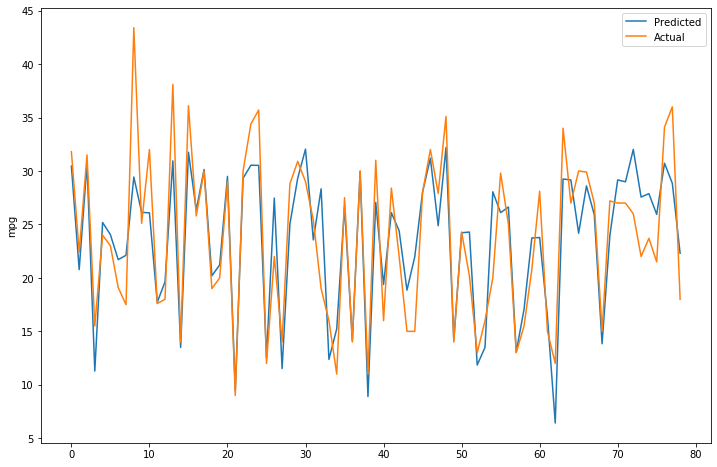

In [35]:
result_dict['kitchen_sink_sgd'] = build_model(sgd_reg,'mpg',
                                             ['cylinders','displacement',
                                            'horsepower','weight','acceleration'],
                                             automobile_df,
                                              show_plot_Y=True,
                                              preprocess_fn=apply_std_scalar)

Our model performed reasonably well during training, and the test scores are good. You can try changing the number of iterations for which you'll train your model to see if this improves.

# Decision Trees for Regression

Another technique that you can use to build a regression model is decision trees. Now decision trees, once again, are typically used for classification,

When you feed in a bunch of training data to your decision tree algorithm, it will set up a tree structure based on this training data, and this tree structure will help make decisions based on rules that it has gleaned from the training data. Based on the training data, you might get a decision tree model 

You feed in data to your decision tree algorithm, the training data, and it'll use the knowledge that it has gleaned from this training data and fit knowledge into rules. And each of these rules will involve a threshold. This is the threshold that you'll use to make decisions. And this is the entire concept behind a decision tree model. Remember that the order of the decision variables will make a difference, and these rules and the order of the decision variables are found using the decision tree algorithm. 

Such a decision tree built on your training data is often referred to as CART. CART stands for classification and regression tree. CART, because these decision trees can be used for both classification, as well as regression.

<img src="../files/Capture6.png">

Once the decision tree has been built for any new individual, you'll traverse the tree to find the right node based on his height and weight. You'll then return the most frequent label of all of the training data points at that node. Most of the players on this node are basketball players. That is a basketball node. 


The same principles can be extended to use decision trees for regression models, you feed in the weight and height of individuals, and then you predict the number of years that that individual spends in his or her career. Remember, regression involves the prediction of a continuous numeric value such as number of years in career. Once again, you will traverse the nodes of your decision tree to find the right node, and once you're on the right node, you'll return the average number of years that sports people in that node have spent in their career. And that is your prediction. 

We use the same decision tree structure, but how you perform your prediction is what is different when you use decision trees for regression.

###### Demo:

The scikit-learn library supports building regression models using decision trees as well. You can use the classification and regression tree algorithm to fit a decision tree onto your training data. 


A decision tree splits your underlying data into subsets where every subset contains points that it considers similar. The data is repeatedly split into subsets to form a tree structure, and the shape of the tree depends on the constraints that you specify. 


Once your decision tree regression model has been built given a test instance, you will traverse the decision tree based on that test instance and return the average value of all training instances in the corresponding leaf node for this particular test instance.


In [38]:
def decision_tree_reg(x_train,y_train,max_depth=2):
    model=DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train,y_train)
    
    return model

Here we've instantiated a DecisionTreeRegressor estimator object with a max depth of 2. 

Decision tree models use several parameters to control the size of the tree, otherwise the trees can get arbitrarily large and consume a lot of memory. 

Max depth is one such parameter available in the decision tree regressor. We can now build and train a decision tree regression model exactly like how we did with previous models. 

Training Score :  0.7316247624931508
Test Score     :  0.712963255968989


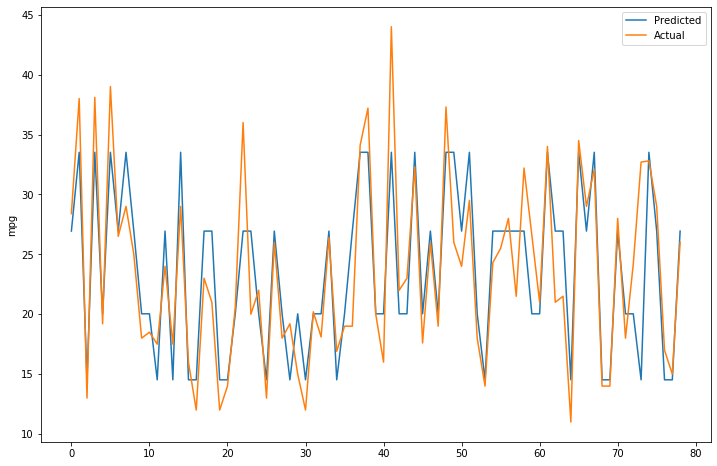

In [48]:
result_dict['kitchen_sink_dn_tree'] = build_model(decision_tree_reg,'mpg',
                                             ['cylinders','displacement',
                                            'horsepower','weight','acceleration'],
                                             automobile_df,
                                            show_plot_Y=True)

This is once again kitchen sink regression. You can see that the training score for this model, about 73%, the test R square is a little lower at 71%.

# LEAST ANGLE REGRESSION

Least angle regression is a regression technique that works well when you have many more features than samples in your dataset. 


You have a small dataset, but with many features for each record. 
 
 
Least angle regression is a technique that relies on selecting x variables that have the highest correlation with the unexplained y variable. 

The variable with the highest correlation is the one which has the least angle, and that's what gives least angle regression its name. 


Let's understand this least angle idea before we move on to the actual regression technique. 

<img src="../files/Capture8.png">

Here we have two vectors, X and Y, that are parallel to one another, and the angle between them is 0 degrees. You can see that these two vectors are perfectly aligned and you can imagine that these two vectors are highly correlated. They have a correlation of 1, which is the highest possible value. A small angle of 0 between vectors corresponds to a high correlation. 

<img src="../files/Capture9.png">

Let's look at opposite vectors here. We have vectors X and Y, which are opposite to one another. They're pointing in opposite directions. The angle between them is 180 degrees. Such vectors are said to be perfectly opposed and they have a correlation of -1, which is the lowest possible. 


<img src="../files/Capture10.png">

Let's consider these two vectors once again, X and Y, this time they're orthogonal. X and Y are at 90 degrees. Orthogonal vectors represent data that are completely uncorrelated. X and Y are unrelated, they are independent variables. Using X to predict Y is not a good idea.

So when you choose X variables to predict Y, you want to pick those X variables which have the least angle, that is a higher correlation. This is the fundamental principle behind least angle regression. 


And let's see this in the form of some pseudocode. You're performing LARS regression and you have a bunch of X variables. 

<img src="../files/Capture11.png">

Initially you'll set all of these X variable coefficients represented by beta equal to 0. 

You'll perform correlation analysis or find that X variable which has the least angle with the Y that you want to predict. i.e Find the predictor Xj most correlated with y. 

And then you'll steadily increase the coefficient of Xj, this coefficient is beta j. 

As you keep increasing this beta of the j, you'll find that there is some other x variable represented by Xi that is more highly correlated than X of j with y. 


At this point, this new variable, Xi, will be added to your model as well, and you'll increase the coefficients beta i and beta j corresponding to Xi and Xj. 

And you'll continue this stepwise process until all of your x variables are present in your regression model. This is the fundamental principle behind LARS regression, and there are several advantages to using this regression analysis technique. 


It works well when the number of dimensions or features are far larger than the number of points in your dataset. 

t's an intuitive and stable algorithm which gives good results in many situations. 

It's the equivalent to forward stepwise regression where you add variables in one by one. 

The one drawback of using LARS is that it has problems dealing with highly correlated x variables. 

Multicollinearity is a major issue when you're using LARS regression, so make sure you explore your x values. 

Try and remove those x features that are highly correlated before you use LARS.

##### Implementing Least Angle Regression

LARS stands for least angle regression and is an algorithm typically used for high dimensionality data. When you use LARS regression, it calculates how correlated each of your features are with the target. 

Features are included in the regression model in the order of their correlation with the target with the highest correlated features added first. There is another kind of regression called stepwise regression which does this as well, however, LARS is much more efficient than stepwise regression. 

LARS is the same complexity as ordinary least squares regression. A parameter to this estimator object is a number of non-0 coefficients in your regression. That's what we'll set to 4 here. 

In [54]:
def lars_reg(x_train,y_train,n_nonzero_coefs=4):
    model=Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train,y_train)
    
    return model

Training Score :  0.7012370815163292
Test Score     :  0.7230531664987925


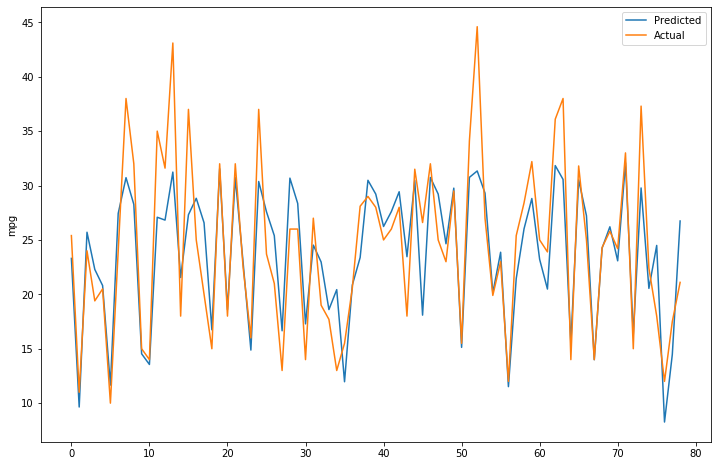

In [58]:
result_dict['kitchen_sink_LARS'] = build_model(lars_reg,'mpg',
                                              ['cylinders','displacement',
                                             'horsepower','weight','acceleration'], 
                                              automobile_df,
                                              show_plot_Y=True)

Once again, this is kitchen sink regression. 

This model performs okay, decently well. A training R square of 70% and a test R square of 72%.

# Regression with Polynomial Relationships

What if the relationships that exist in your data cannot be captured using a liner model? So far, we've assumed that the relationship between y and x is linear. That is x a polynomial of degree 1 in our formula. This is a basic relationship that we're trying to capture when we build a linear model on our data. Y is equal to Wx + b. X is raised to the power 1.

But what if this linear relationship that we've assumed is not really right for our data? What if the relationship between y and x in our data is a polynomial of degree 2? Maybe it's of this form : 
- Vx2 + Wx + b. 


This is a polynomial of degree 2. 

You can extend this to other polynomial relationships as well of degree 3, 4, and so on. Now in such situations, when the relationship between y and your x variables is non-linear, you'll find that the linear model performs poorly.

A straight line is not the best representation of your data. In such situations, a quadratic fit might be a better model, it might perform better for predictive analytics.

<img src="../files/Capture12.png">

<img src="../files/Capture13.png">

So your data looks this way, but you still want to use a linear model on your data. Well, there is a way out. 


You'll simply change or transform your data to generate polynomials of a certain degree of all input features. So if your input features are just x, you'll add additional polynomials. You'll generate x2, x3, x raised to the power of 4, all of the polynomials that you'll need, and then on this polynomial data, you can fit a simpler model such as a linear model. 

A linear model is simple and robust and you might have many reasons for using it, which is why if you have a nonlinear relationship, apply transformations or generate polynomial features of your underlying data and then fit the simpler model.